The `show()` method of the `Particelset` class is capable of plotting the particle locations and velocity fields in scalar and vector form. In this notebook, we demonstrate these capabilities using the GlobCurrent dataset. We begin by importing the relevant modules. 

In [1]:
%matplotlib inline
from parcels import *
from scripts import *
import numpy as np
import math
import datetime
from datetime import timedelta, datetime

We then instatiate a `Grid` with the velocity field data from GlobCurrent dataset. 

In [2]:
filenames = {'U': "GlobCurrent_example_data/20*.nc",
             'V': "GlobCurrent_example_data/20*.nc"}
variables = {'U': 'eastward_eulerian_current_velocity',
             'V': 'northward_eulerian_current_velocity'}
dimensions = {'lat': 'lat',
              'lon': 'lon',
              'time': 'time'}
grid = Grid.from_netcdf(filenames, variables, dimensions)

Next, we instantiate a `ParticeSet` composed of `JITParticles`: 

In [3]:
pset = grid.ParticleSet(size=5, pclass=JITParticle, start=(31, -31), finish=(32, -31))

Given this `ParticleSet`, we can now explore the different features of the `show()` method. To start, let's simply call `show()` with no arguments. 

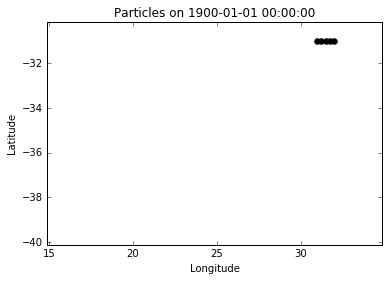

In [4]:
pset.show()

Then, let's advect the particles starting on January 1, 2002 for a week. 

In [5]:
pset.execute(AdvectionRK4, starttime=datetime(2002, 1, 1), runtime=timedelta(days=7),
             dt=timedelta(minutes=5), interval=timedelta(hours=6))

Compiled JITParticleAdvectionRK4 ==> /var/folders/rn/w27yh9t521vdz7zq_lngqq1m0000gp/T/parcels-502/c40f5f0ead2b93182413ae905e4b193d.so


If we call `show()` again, we will see that the particles have been advected:

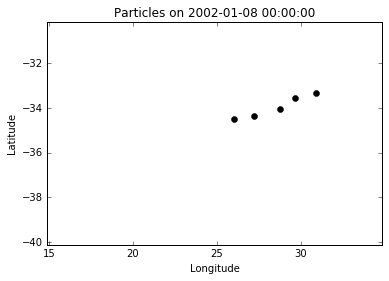

In [6]:
pset.show()

If we want to save the file rather than show it, we set the argument `savefile` equal to the `'path/to/save/file'`.  

In [7]:
pset.show(savefile='particles')

Plot saved to particles.png


To set the domain of the plot, we specify the domain argument. The format `domain` expects is `[max lat, min lat, max lon, min lon]`. Note that plotted domain is found by interpolating the user-specified domain onto the velocity grid. For instance, 

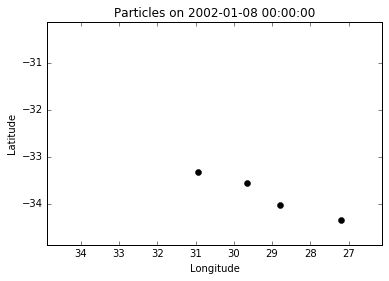

In [8]:
pset.show(domain = [-30, -35, 35, 26] )


We can also easily display a scalar contour plot of a single component of the velocity vector field. This is done by setting the `field` argument equal to the desired scalar velocity field. 

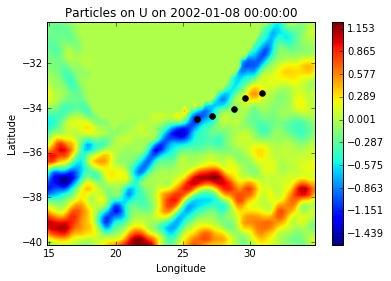

In [9]:
pset.show(field=grid.U)

To plot the scalar U velocity field at a different date and time, we set the argument `t` equal to a `datetime` or `timedelta` object or simply the number of seconds since the time origin. For instance, let's view the U field on January, 10, 2002 at 2 PM.

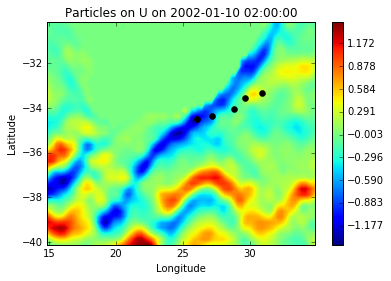

In [10]:
pset.show(field=grid.U, t = datetime(2002, 1, 10, 2))

Note that the particle locations do not change, but remain at the locations corresponding to  the end of the last integration. 

By setting the `vector` argument equal to `True`, we can display the velocity in vector form 

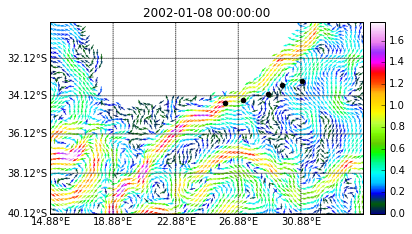

In [11]:
pset.show(vector=True)

The normalized vector field is colored by speed. To control the maximum speed value on the colorbar, set the `vmax` argument equal to the desired value. 

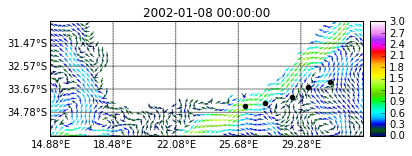

In [12]:
pset.show(vector = True, vmax = 3.0, domain = [-30, -36, 33, 10])

We can also easily land present in the domain using the Basemap module's built-in land mask:

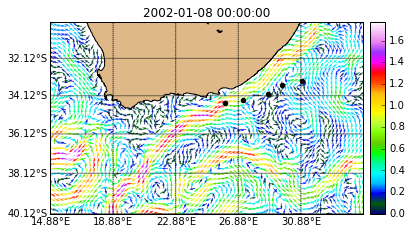

In [13]:
pset.show(vector = True, land = True)